## General Information

In this project I'm gonna find out the Iris Flower species based on their features line petal length, petal width, sepal length, sepel width etc. There are three species of iris flower as follows: setaosa, versicolor and verginica

<img src='./images/Iris_setosa.jpg'></img>

## Content

* [1. Data Loading And Overview](#data_loading)
* [2. Label Encoding of Species](#label_encoding)
* [3. Selecting Features And Collecting Samples](#feature_selection)
* [4. Separation of Test And Train Data](#test_train_separation)
* [5. Decision Boundary Plotter](#decision_boundary)
* [6. Standardization of Features](#feature_standardization)
* [7. Applying Perceptron Classifier](#perceptron)
* [8. Applying Logistic Regression](#logistic)

In [51]:
## Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

<a id="data_loading"></a>
## Data Loading And Overview

In [20]:
iris_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

## Set the column
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Here speciies is the target column that we need to predict.

In [21]:
print("Total nuber of samples: ", len(iris_data))
print("Unique flower species: ", len(np.unique(iris_data['species'])))

Total nuber of samples:  150
Unique flower species:  3


In [22]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
## Find the correlarion Matrix
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


From the above correlation matrix, we can see that petal length and petal width are highly correlated features. So we can take these two features to predict the class labels.

Now let see are they linearly separable or not

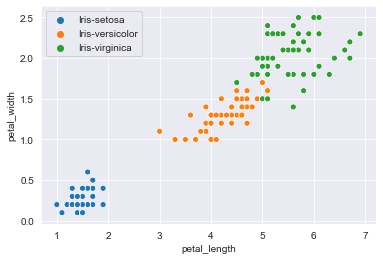

In [24]:
sns.set_style('darkgrid')
sns.scatterplot(x=iris_data['petal_length'], y=iris_data['petal_width'], hue=iris_data['species'].values)

<a id='label_encoding'></a>
## Label Encoding of Species

Before going farther we need to change the species colume because many machine learning algorithms works better on quantitative data. So we use label encoding to map the species column with discrete values, then we will apply OVA technique for multi-class classification.

In [25]:
species_le = LabelEncoder()
y = species_le.fit_transform(iris_data['species'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So we got the label encoded data where setosa labeled as 0, versicolor labeled as 1 and virginica labeled as 2

<a id='feature_selection'></a>
## Selecting Features And Collecting Samples

As per our previous exploration we are taking Petal length and Petal width features to find out the class of Iris Flowers

In [45]:
X = iris_data.iloc[:, [2,3]].values

Here X is an np-array containing only petal_length and petal_width

<a id='test_train_separation'></a>
## Separation of Test And Train Data 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## Let's find the proportion of class labes in the datasets
print("Label count in y:", np.bincount(y))
print("Label count in y_train:", np.bincount(y_train))
print("Label count in y_test:", np.bincount(y_test))

Label count in y: [50 50 50]
Label count in y_train: [35 35 35]
Label count in y_test: [15 15 15]


<a id='decision_boundary'></a>
## Decision Boundary Plotter

In [47]:
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
    ## set the colors and markers for listed color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']   
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],
                   label=cl, edgecolors='black')
        
    ## Highlight the test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', marker='o', alpha=1.0, 
                    linewidths=1, s=100, label='test set', edgecolors='black')

<a id='feature_standardization'></a>
## Standardization of Features

Feature standardization helps in scaling the feature values almost in the same range. That helps in learning and fit the model faster.

In [48]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Combine the standard dataset
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<a id='perceptron'></a>
## Applying Perceptron Classifier

In [49]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_predict = ppn.predict(X_test_std)
print("Missclassified Samples: %d" %(y_test != y_predict).sum())
print("Accuracy Score of Perceptron Classifier: %d"% accuracy_score(y_test, y_predict))

Missclassified Samples: 4
Accuracy Score of Perceptron Classifier: 0


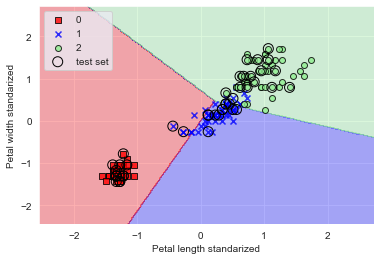

In [50]:
## Find the Decision Boundary
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('Petal length standarized')
plt.ylabel('Petal width standarized')
plt.legend(loc='upper left')
plt.show()

<a id='logistic'></a>
## Applying Logistic Regression

In [52]:
lr = LogisticRegression(max_iter=40, C=1.0, random_state=1)
lr.fit(X_train_std, y_train)
y_predict = lr.predict(X_test_std)
print("Missclassified Samples: %d" %(y_test != y_predict).sum())
print("Accuracy Score of Logistic Regression Classifier: %d"% accuracy_score(y_test, y_predict))

Missclassified Samples: 3
Accuracy Score of Logistic Regression Classifier: 0


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
